# Importing Required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as sqltor
import seaborn as sns

## Connecting with MySQL :

In [2]:
my_connection = sqltor.connect(host = 'localhost', user = 'root', passwd = 'warmachine68', database = 'house_data')

In [3]:
my_connection.is_connected()

True

In [4]:
df = pd.read_sql('Select * from bengaluru_prices',my_connection)

From here, we infer that we have successfully connected with our MySQL Database.

## Using MySQL commands :

In [5]:
pd.read_sql('Select * from bengaluru_prices',my_connection).head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2.0,3.0,62.00


In [6]:
pd.read_sql('SELECT * FROM bengaluru_prices WHERE balcony > 1; ',my_connection).head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
1,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2.0,3.0,62.0
2,Super built-up Area,18-Feb,Whitefield,3 BHK,None,1800,2.0,2.0,70.0


In [7]:
pd.read_sql('SELECT AVG(price), SUM(price), COUNT(price) from bengaluru_prices',my_connection).head(3)

,AVG(price),SUM(price),COUNT(price)
0,112.565627,1499374.145,13320


# Exploratory Data Analysis :

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200,2.0,1.0,51.00


In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Data Cleaning - 

### Handling NULL values :

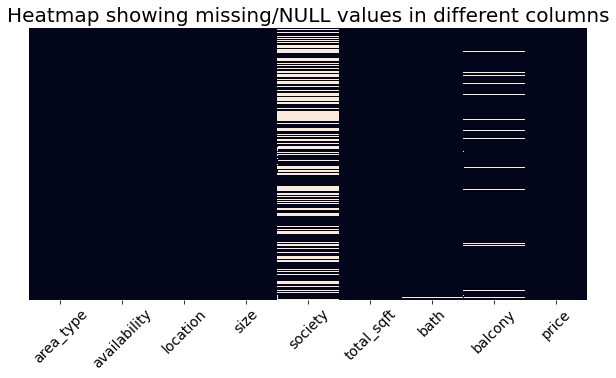

In [10]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45, fontsize = 14)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False).set_title('Heatmap showing missing/NULL values in different columns',fontsize = 20)
plt.show()

From this heatmap, we can clearly observe that such a large amount of data is missing from the society column that we cannot extract any useful information from this so we will simply drop this column. 

In [11]:
df.drop(columns = ['society'], axis = 1, inplace = True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
df.balcony = df.balcony.fillna(df.balcony.mean())

In [13]:
df = df.dropna()

In [14]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
df.count()

area_type       13246
availability    13246
location        13246
size            13246
total_sqft      13246
bath            13246
balcony         13246
price           13246
dtype: int64

<AxesSubplot:>

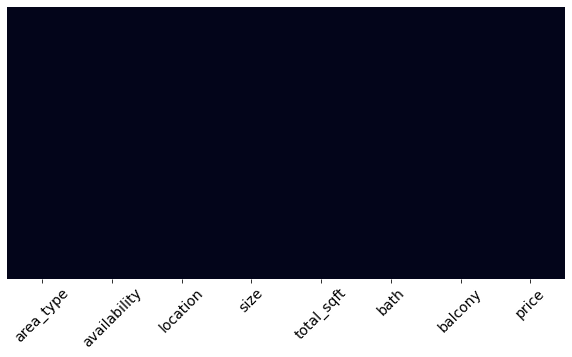

In [16]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45, fontsize = 14)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

Here, we can clearly see from the above heatmap that we have completely eliminated all the null values from our Dataframe. Now we can proceed with further cleaning of our data to so as to make it more analysable.

## Changing Data Types for better extraction of Data :

On having a close look at the data, we found that the data in the column total_sqft has its sizes in various different units (such as sq. yards, acres, etc). So converting all the other units into sqft. and changing the column's datatype to float.  

In [17]:
for i in df.total_sqft:
    if 'Sq. Yards' in i:
        v = float(i[0:i.index('S')]) * 9 
        df.total_sqft.replace(i, str(v), inplace = True)
    elif 'Sq. Meter' in i:
        w = float(i[0:i.index('S')]) * 10.7639
        df.total_sqft.replace(i, str(w), inplace = True)
    elif 'Acres' in i:
        x = float(i[0:i.index('A')]) * 43560
        df.total_sqft.replace(i, str(x), inplace = True)
    elif 'Perch' in i:
        y = float(i[0:i.index('P')]) * 272.25
        df.total_sqft.replace(i, str(y), inplace = True)
    elif '-' in i:
        p = float(i[0 : i.index('-') - 1 ])
        q = float(i[i.index('-') + 2 : len(i)])
        r = (p + q)/2
        df.total_sqft.replace(i, str(r), inplace = True)
    elif 'Cent' in i:
        z = float(i[0:i.index('C')]) * 435.6
        df.total_sqft.replace(i, str(z), inplace = True)
    elif 'Guntha' in i:
        s = float(i[0:i.index('G')]) * 1089
        df.total_sqft.replace(i, str(s), inplace = True)
    elif 'Ground' in i:
        t = float(i[0:i.index('G')]) * 2400
        df.total_sqft.replace(i, str(t), inplace = True)
    else:
        df.total_sqft.replace(i, i, inplace = True)

In [18]:
df.total_sqft = df['total_sqft'].astype('float')

In [19]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


#### Now, changing records in the column 'size' to numeric values. 

In [20]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [22]:
# HERE WE HAVE CONSIDERED 1 BEDROOM = 1RK  = 1 BHK

for i in df['size']:
    if 'B' in i:
        df['size'].replace(to_replace = i, value = i[0 : i.index('B')-1], inplace = True)
    elif 'R' in i:
        df['size'].replace(to_replace = i, value = i[0 : i.index('R')-1], inplace = True)

In [23]:
df['size'] = df['size'].astype('float64')

In [24]:
df.rename(columns = {'size':'BHK'},inplace = True)

In [25]:
df.head()

,area_type,availability,location,BHK,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


# Feature Engineering :

   ####  Creating new feature as price_per_sqft -

Now, let's make a new column as price_per_sqft which tells the price of land in each record per square feet.

In [26]:
df.loc[:,'price_per_sqft'] = df.loc[:,'price'] * 100000/df.loc[:,'total_sqft']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13246 non-null  object 
 1   availability    13246 non-null  object 
 2   location        13246 non-null  object 
 3   BHK             13246 non-null  float64
 4   total_sqft      13246 non-null  float64
 5   bath            13246 non-null  float64
 6   balcony         13246 non-null  float64
 7   price           13246 non-null  float64
 8   price_per_sqft  13246 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


#### Creating new feature as sqft_per_BHK -

In this column, we will now enter the area in square feet per BHK of each record in our database.

In [28]:
df.loc[:,'sqft_per_BHK'] = df.loc[:,'total_sqft'] / df.loc[:,'BHK']

In [29]:
df.groupby('area_type').describe()

BHK                                                \
                       count      mean       std  min  25%  50%  75%   max   
area_type                                                                    
Built-up  Area        2410.0  2.787552  1.228421  1.0  2.0  3.0  3.0  10.0   
Carpet  Area            87.0  2.666667  1.394897  1.0  2.0  2.0  3.0   9.0   
Plot  Area            2009.0  4.060229  1.995477  1.0  3.0  4.0  5.0  43.0   
Super built-up  Area  8740.0  2.517963  0.865889  1.0  2.0  2.0  3.0  27.0   

                     total_sqft               ... price_per_sqft              \
                          count         mean  ...            75%         max   
area_type                                     ...                              
Built-up  Area           2410.0  2107.051567  ...    6801.522843   2300000.0   
Carpet  Area               87.0  1295.648119  ...    8333.961293    200000.0   
Plot  Area               2009.0  3565.531628  ...   15000.000000  12000000.0   
Super built-up  Area     8740.0  1480.105325  ...    6489.243775     56000.0   

                     sqft_per_BHK                                        \
                            count         mean           std        min   
area_type                                                                 
Built-up  Area             2410.0   643.740862   2564.266435   0.714286   
Carpet  Area                 87.0   490.511683    146.051809  15.000000   
Plot  Area                 2009.0  1292.305234  16639.494655   0.250000   
Super built-up  Area       8740.0   584.137643    208.035046  89.285714   

                                                           
                             25%    50%    75%        max  
area_type                                                  
Built-up  Area        475.000000  550.0  630.0  124781.25  
Carpet  Area          411.516667  487.5  550.0    1125.00  
Plot  Area            240.000000  400.0  600.0  653400.00  
Super built-up  Area  500.000000  564.5  626.5    9000.00  

[4 rows x 56 columns]

#### Analysing Data from area_type -

In [30]:
b = df.groupby('area_type').describe()

In [31]:
b.iloc[:,17]

area_type
Built-up  Area          2.649378
Carpet  Area            2.505747
Plot  Area              3.893479
Super built-up  Area    2.430320
Name: (bath, mean), dtype: float64

In [32]:
c = b.iloc[:,17]

In [33]:
df['area_type'].value_counts()

Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

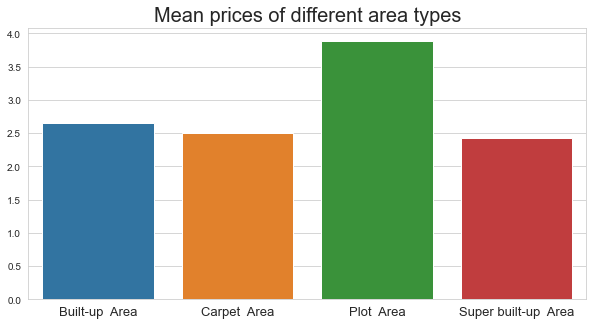

In [34]:

sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
plt.xticks(fontsize = 13)
sns.barplot(x = list(c.index),y = list(c[0:4])).set_title('Mean prices of different area types', fontsize = 20)
plt.show()

Here we see that mean prices of different area types are nearly equal (except for Plot Area type) and also the value counts of different area types vary over a wide range which will cause the model to overfit. So removing area_type from aur Dataframe.

In [35]:
df.drop(['area_type'], axis = 1, inplace = True)

In [36]:
df.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_BHK
0,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,528.0
1,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,650.0
2,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,480.0
3,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,507.0
4,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,600.0


##### Analysing Data from availability -

In [37]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [38]:
lst1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in df['availability']:
    for j in range(0, len(lst1)):
        if i[3:6] == lst1[j]:
            df.availability.replace(i, str(j+1),inplace = True)
        elif i[0:2] == 'Re':
            df.availability.replace(i, str(0),inplace = True)

In [39]:
df.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_BHK
0,12,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,528.0
1,0,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,650.0
2,0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,480.0
3,0,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,507.0
4,0,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,600.0


In [40]:
df.groupby('availability').describe()

BHK                                                \
                count      mean       std  min  25%  50%  75%   max   
availability                                                          
0             10564.0  2.868232  1.365601  1.0  2.0  3.0  3.0  43.0   
1               126.0  2.523810  1.078623  1.0  2.0  2.0  3.0   7.0   
10               90.0  2.644444  0.708077  1.0  2.0  3.0  3.0   4.0   
11               79.0  2.405063  0.742811  1.0  2.0  2.0  3.0   4.0   
12              711.0  2.520394  0.842075  1.0  2.0  2.0  3.0   6.0   
2                74.0  2.986486  1.485023  1.0  2.0  3.0  3.0   9.0   
3               239.0  2.556485  0.923520  1.0  2.0  3.0  3.0   8.0   
4               296.0  2.621622  1.327188  1.0  2.0  2.0  3.0  18.0   
5               331.0  2.640483  0.853189  1.0  2.0  3.0  3.0   8.0   
6               196.0  2.464286  0.806226  1.0  2.0  2.0  3.0   5.0   
7               205.0  2.507317  0.718246  1.0  2.0  2.0  3.0   5.0   
8               249.0  2.365462  0.734361  1.0  2.0  2.0  3.0   5.0   
9                86.0  2.418605  0.774067  1.0  2.0  2.0  3.0   4.0   

             total_sqft               ... price_per_sqft                \
                  count         mean  ...            75%           max   
availability                          ...                                
0               10564.0  1868.890308  ...    7548.730678  1.200000e+07   
1                 126.0  1752.495169  ...    7060.593804  3.499579e+04   
10                 90.0  1469.258333  ...    5863.882212  3.633333e+05   
11                 79.0  1327.417722  ...    5743.458029  1.128571e+04   
12                711.0  1467.756281  ...    6734.110393  6.727273e+05   
2                  74.0  1606.851351  ...    7532.909317  4.848485e+04   
3                 239.0  8015.638807  ...    7042.328255  4.799465e+04   
4                 296.0  1464.878007  ...    6489.864865  2.861446e+04   
5                 331.0  1556.369456  ...    6795.790416  2.716667e+04   
6                 196.0  1457.557143  ...    7150.713480  1.712121e+04   
7                 205.0  1617.867463  ...    6666.666667  2.340411e+04   
8                 249.0  1292.092529  ...    6315.789474  2.296296e+04   
9                  86.0  1430.950581  ...    5912.226735  7.653061e+04   

             sqft_per_BHK                                                     \
                    count         mean           std         min         25%   
availability                                                                   
0                 10564.0   648.086184   2977.055604    0.250000  466.666667   
1                   126.0   638.774750    296.960910  166.666667  498.375000   
10                   90.0   551.216667    142.338456   15.000000  483.416667   
11                   79.0   550.361814    149.960972  337.000000  447.500000   
12                  711.0   577.866568    161.191608    3.666667  474.666667   
2                    74.0   565.610736    206.320368  133.333333  483.000000   
3                   239.0  4310.604600  44725.603155  131.250000  506.666667   
4                   296.0   576.975705    237.949869   66.666667  475.000000   
5                   331.0   578.256991    200.483435  200.000000  478.750000   
6                   196.0   587.440136    133.129309  400.000000  513.916667   
7                   205.0   622.745528    499.801270  395.000000  524.333333   
8                   249.0   551.697342    103.983486  240.000000  497.000000   
9                    86.0   586.321202    171.185196  354.000000  496.208333   

                                                     
                     50%         75%            max  
availability                                         
0             550.000000  625.000000  217800.000000  
1             600.000000  643.750000    2080.250000  
10            538.500000  615.750000    1065.000000  
11            529.333333  600.000000    1166.666667  
12            561.250000  642.500000 

In [41]:
df.groupby('availability').describe().iloc[:,17]

availability
0     2.741670
1     2.515873
10    2.466667
11    2.240506
12    2.506329
2     3.094595
3     2.527197
4     2.533784
5     2.580060
6     2.448980
7     2.517073
8     2.289157
9     2.348837
Name: (bath, mean), dtype: float64

In [42]:
p = df.groupby('availability').describe().iloc[:,17]

In [43]:
p.index = p.index.astype('int')

In [44]:
p = p.sort_index()

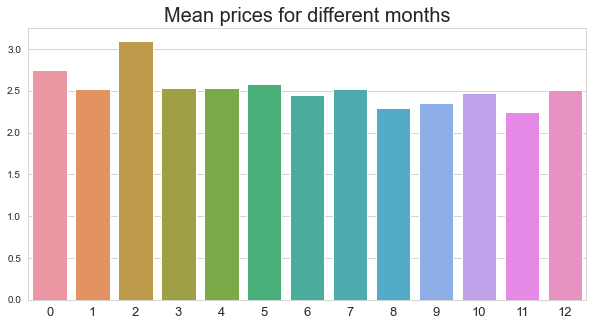

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.xticks(fontsize = 13)
sns.barplot(x = list(p.index), y = list(p[0:13])).set_title('Mean prices for different months', fontsize = 20)
plt.show()

Here we see that prices don't fluctuate much in different months. So it would be better to drop this column as this won't provide us any useful insights.

In [46]:
df.drop(['availability'], axis = 1, inplace = True)



# Outlier Removal :

In [47]:
df.describe()

,BHK,total_sqft,bath,balcony,price,price_per_sqft,sqft_per_BHK
count,13246.000000,1.324600e+04,13246.000000,13246.000000,13246.000000,1.324600e+04,13246.000000
mean,2.801902,1.909255e+03,2.692586,1.584344,112.389392,7.915281e+03,701.773683
std,1.295758,1.732484e+04,1.341506,0.800579,149.076587,1.065452e+05,6577.438478
min,1.000000,1.000000e+00,1.000000,0.000000,8.000000,2.257423e+00,0.250000
25%,2.000000,1.100000e+03,2.000000,1.000000,50.000000,4.262295e+03,473.196667
50%,3.000000,1.275000e+03,2.000000,2.000000,72.000000,5.433101e+03,552.000000
75%,3.000000,1.678750e+03,3.000000,2.000000,120.000000,7.317073e+03,625.000000
max,43.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.200000e+07,653400.000000


Here, dropping all the rows where area in sq.ft. per BHK is less than 300sq.ft. as it would be impractical to have one like that.

In [48]:
df = df[df['sqft_per_BHK'] > 300]

Dropping the column sqft_per_BHK as it has performed its task of removing the some outliers.

In [49]:
df.drop(['sqft_per_BHK'], axis = 1, inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12316 non-null  object 
 1   BHK             12316 non-null  float64
 2   total_sqft      12316 non-null  float64
 3   bath            12316 non-null  float64
 4   balcony         12316 non-null  float64
 5   price           12316 non-null  float64
 6   price_per_sqft  12316 non-null  float64
dtypes: float64(6), object(1)
memory usage: 769.8+ KB


In [51]:
df.price_per_sqft.describe()

count     12316.000000
mean       6202.463047
std        4054.430860
min           2.257423
25%        4199.684878
50%        5263.157895
75%        6826.192062
max      176470.588235
Name: price_per_sqft, dtype: float64

Here, on having a look at the minimum and maximum values of the column 'price_per_sqft', we infer that there is a huge difference between the minimum and maximum values. So, dropping all rows either very high or very low from mean value of price per sqft as data spread over a wide range will cause overfitting which will ultimately hinder the model's accuracy.

In [52]:
df.columns

Index(['location', 'BHK', 'total_sqft', 'bath', 'balcony', 'price',
       'price_per_sqft'],
      dtype='object')

In [53]:
df.head()

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


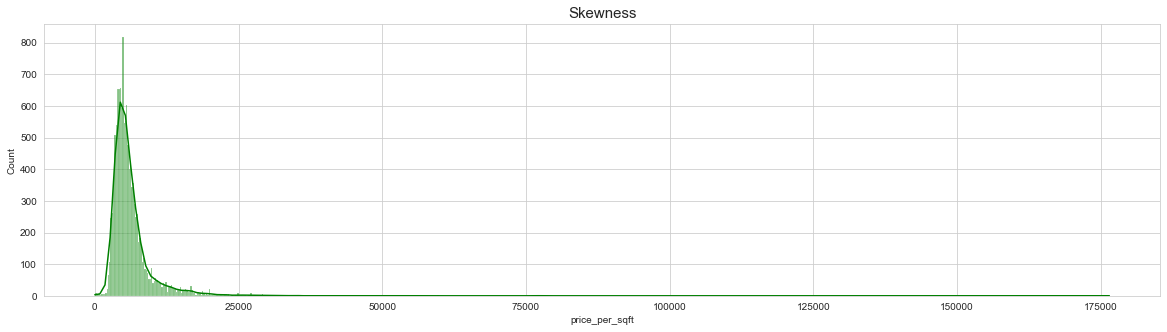

'skewness is :'

9.698589530500305

In [54]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,5))
plt.title('Skewness', fontsize = 15)
sns.set(font_scale = 1)
sns.histplot(df['price_per_sqft'], kde = True, color = 'green')
plt.show()
display('skewness is :', df.price_per_sqft.skew())

In [55]:
a1 = df['price_per_sqft'].mean() - (df['price_per_sqft'].std())
a2 = df['price_per_sqft'].mean() + (df['price_per_sqft'].std())
b1 = df.price_per_sqft[df.price_per_sqft <= a1]
b2 = df.price_per_sqft[df.price_per_sqft >= a2]
b1.index = list(b1.index)
df = df.drop(b1.index, axis = 0)
b2.index = list(b2.index)
df = df.drop(b2.index, axis = 0)

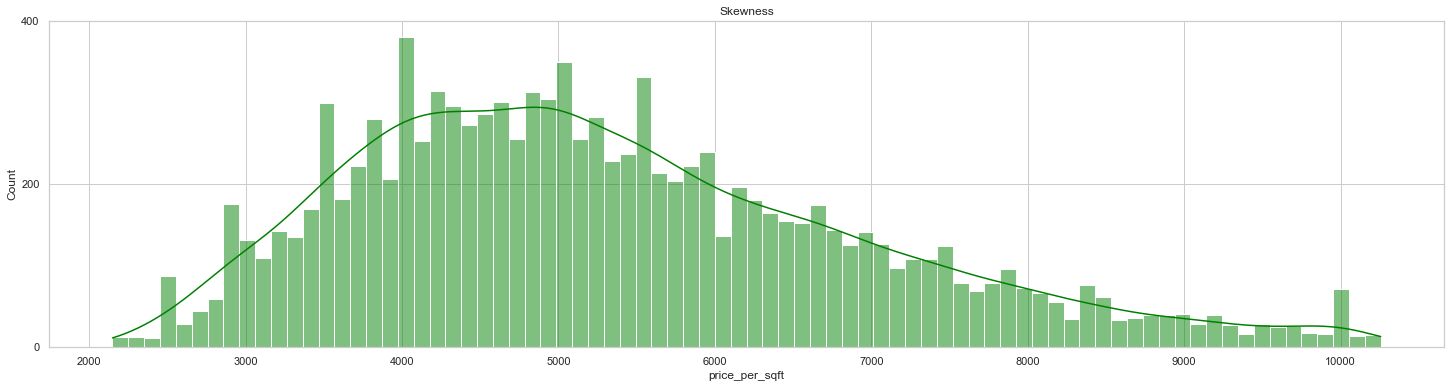

In [56]:
plt.figure(figsize = (25,6))
sns.set_style('whitegrid')
sns.histplot(df.price_per_sqft, kde = True, color = 'green', bins = 80).set_title('Skewness')
sns.set(font_scale = 3)
plt.show()

In [57]:
df.price_per_sqft.skew()

0.6733320774553124

In [58]:
df.describe()

,BHK,total_sqft,bath,balcony,price,price_per_sqft
count,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000,11187.000000
mean,2.552784,1488.741935,2.450165,1.585553,83.278677,5335.443963
std,0.892665,856.504494,0.970279,0.784306,66.060372,1625.246537
min,1.000000,340.000000,1.000000,0.000000,10.000000,2149.277061
25%,2.000000,1100.000000,2.000000,1.000000,47.000000,4110.350076
50%,2.000000,1275.000000,2.000000,2.000000,65.000000,5066.625917
75%,3.000000,1625.000000,3.000000,2.000000,95.000000,6323.345659
max,16.000000,30400.000000,16.000000,3.000000,2100.000000,10256.410256


In [59]:
df.head()

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


Plotting data of prices of 2 BHK and 3 BHK flats

In [60]:
def scatter_chart(df, location):
    a = df[(df.location == location) & (df.BHK == 2)]
    b = df[(df.location == location) & (df.BHK == 3)]
    sns.set(font_scale = 1)
    plt.figure(figsize = (7,5))
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.title(location)
    plt.scatter(a.total_sqft, a.price_per_sqft, color = 'Blue', label = '2 BHK')
    plt.scatter(b.total_sqft, b.price_per_sqft, color = 'green', label = '3 BHK')
    plt.xlabel('Total Area in Sqft. --->', fontsize = 12)
    plt.ylabel('Price per Sqft. --->', fontsize = 12)
    plt.title(location, fontsize = 20)
    plt.legend()

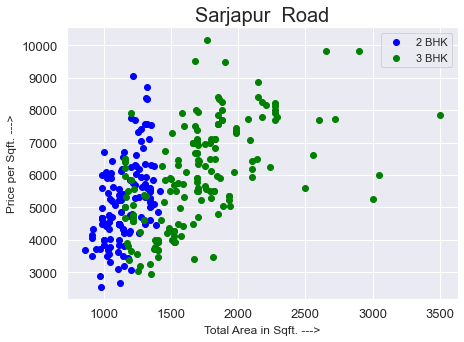

In [61]:
scatter_chart(df, 'Sarjapur  Road')

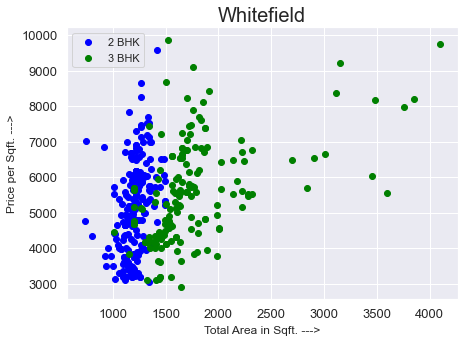

In [62]:
scatter_chart(df,'Whitefield')

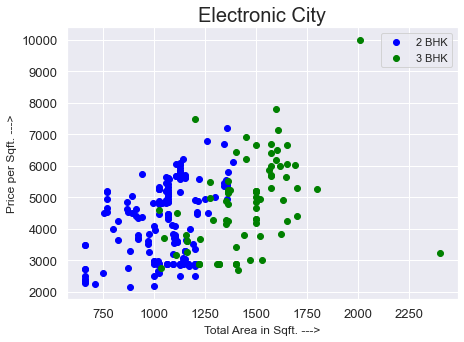

In [63]:
scatter_chart(df, 'Electronic City')

In [64]:
df.head(3)

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556


In [65]:
df.BHK = df.BHK.astype('int')

Removing some of the entries where price per sqft of 2 BHK flats is less than mean price per sqft of 1 BHK flats. Similarly, for 3 BHK and 4 BHK flats too.

In [66]:
lst = []
for i,j in df.groupby('BHK'):
    mean = j['price_per_sqft'].mean()
    lst.append(mean)
lst

[5118.580125485394,
 4938.533702205596,
 5597.502555146354,
 6709.094693258667,
 6318.853424585863,
 5497.089904425821,
 4705.306482667697,
 4677.296378473915,
 4064.253649148257,
 3717.5925925925926,
 4850.0,
 5069.124423963133,
 5500.0]

In [67]:
np.sort(df.BHK.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 16])

In [68]:
l = []
for a in range(2,7):
    for i in df[(df.BHK == a) & (df.price_per_sqft < 5122.815770781089)].index:
        l.append(i)

for a in range(3,7):
    for i in df[(df.BHK == a) & (df.price_per_sqft < 4938.0951715637775)].index:
        l.append(i)


for a in range(4,7):
    for i in df[(df.BHK == 4) & (df.price_per_sqft < 5595.669150147777)].index:
        l.append(i)

In [69]:
len(l)

7933

In [70]:
df = df.drop(l, axis = 0)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5758 entries, 3 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5758 non-null   object 
 1   BHK             5758 non-null   int32  
 2   total_sqft      5758 non-null   float64
 3   bath            5758 non-null   float64
 4   balcony         5758 non-null   float64
 5   price           5758 non-null   float64
 6   price_per_sqft  5758 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 337.4+ KB


### Checking correlation between various features and dropping features less correlated with price :

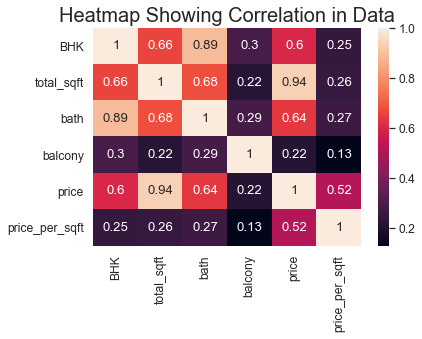

<Figure size 1080x432 with 0 Axes>

In [72]:
sns.set(font_scale = 1.1)
plt.xticks(rotation = 90)
sns.heatmap(df.corr(),annot = True).set_title('Heatmap Showing Correlation in Data', fontsize = 20)
plt.figure(figsize = (15,6))
plt.show()

On seeing the above heatmap, we will now remove the column balcony from our dataframe as it is very less correlated with the prices. Also we will drop the column price_per_sqft as it has also done its task of removing outliers.

In [73]:
df.drop(['balcony','price_per_sqft'], axis = 1,inplace = True)
df.head()

,location,BHK,total_sqft,bath,price
3,Lingadheeranahalli,3,1521.0,3.0,95.0
6,Old Airport Road,4,2732.0,4.0,204.0
14,Sarjapur,3,2250.0,3.0,148.0
15,Mysore Road,2,1175.0,2.0,73.5
20,Kengeri,1,600.0,1.0,15.0


##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Analysing data from location column -
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [74]:
df.location.value_counts()

Whitefield                              287
Sarjapur  Road                          235
Thanisandra                             144
Kanakpura Road                          130
Hebbal                                  129
                                       ... 
ravindra nagar, T.dasarahalli peenya      1
basaveshwarnagar                          1
Shauhardha Layout                         1
Banashankari 2 nd Stage                   1
RMV                                       1
Name: location, Length: 809, dtype: int64

Here, naming those locations which are not prime and have very few value counts('less than 15') as 'other' to prevent our Dataframe from getting overfit and making it concise and crisp. 

In [75]:
other_locations = df.location.value_counts()[df.location.value_counts() <= 15]

In [76]:
df.location = df.location.apply([lambda x : 'other' if x in other_locations else x])

In [77]:
df.head()

,location,BHK,total_sqft,bath,price
3,Lingadheeranahalli,3,1521.0,3.0,95.0
6,Old Airport Road,4,2732.0,4.0,204.0
14,Sarjapur,3,2250.0,3.0,148.0
15,Mysore Road,2,1175.0,2.0,73.5
20,Kengeri,1,600.0,1.0,15.0


In [78]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1,inplace = True)

In [79]:
df.head(3)

,location,BHK,total_sqft,bath,price
0,Lingadheeranahalli,3,1521.0,3.0,95.0
1,Old Airport Road,4,2732.0,4.0,204.0
2,Sarjapur,3,2250.0,3.0,148.0


In [80]:
df.location.value_counts()

other              1983
Whitefield          287
Sarjapur  Road      235
Thanisandra         144
Kanakpura Road      130
                   ... 
Sanjay nagar         16
Padmanabhanagar      16
Kalena Agrahara      16
Domlur               16
Rachenahalli         16
Name: location, Length: 90, dtype: int64

In [81]:
a = pd.get_dummies(df['location'])

In [82]:
df = pd.concat([df,a], axis = 1)
df.drop(['location'],axis = 1,inplace = True)
df.head()

,BHK,total_sqft,bath,price,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,3,1521.0,3.0,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2732.0,4.0,204.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2250.0,3.0,148.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1175.0,2.0,73.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,600.0,1.0,15.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Making a pickle file of the cleaned dataset

In [83]:
import pickle
pickle.dump(df, open(r'C:\Users\xyz\Desktop\clean_dataset.pkl', 'wb'))

Here, we have created dummies because in machine learning models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [84]:
df.count()

BHK                   5758
total_sqft            5758
bath                  5758
price                 5758
1st Phase JP Nagar    5758
                      ... 
Whitefield            5758
Yelahanka             5758
Yelahanka New Town    5758
Yeshwanthpur          5758
other                 5758
Length: 94, dtype: int64

# Building Machine Learning model using scikit learn :

Now, after cleaning, analysing and processing data, we will create a Machine Learning Model which based on LINEAR REGRESSION for predicting the price of a house on the basis of the parameters on which it depends on.

So here, we will now split our data into two parts of 80% and 20% for training and testing our model respectively.

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis = 1),
                                                    df['price'], test_size = 0.15)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

In [88]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [89]:
model2 = Ridge()
params = {'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,0.1,1,10,20,40,50,55,70,30,90,100,125,1000,10000,100000]}
gd = GridSearchCV(model2, params, scoring = 'r2')
gd.fit(df.drop('price', axis = 1), df['price'])
model2 = gd.best_estimator_
model2.fit(x_train, y_train)

C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33808e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87837e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79812e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79984e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16781e-20): result may not be accurate.
  return

Ridge(alpha=1)

In [90]:
model3 = Lasso()
params = {'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,0.1,1,10,20,40,50,55,70,30,90,100,125,1000,10000,100000]}
gd = GridSearchCV(model3, params, scoring = 'r2')
gd.fit(df.drop('price', axis = 1), df['price'])
model3 = gd.best_estimator_
model3.fit(x_train, y_train)

C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1624927.6810075375, tolerance: 2565.0821798966017
  model = cd_fast.enet_coordinate_descent(
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615217.244849717, tolerance: 3090.986628933263
  model = cd_fast.enet_coordinate_descent(
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663957.4892377008, tolerance: 3166.192027049079
  model = cd_fast.enet_coordinate_descent(
C:\Users\xyz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Ob

Lasso(alpha=0.01)

In [91]:
dict = {'Model Accuracy' : [model.score(x_test, y_test),model2.score(x_test, y_test),model3.score(x_test, y_test)]}
pd.DataFrame(dict, index = ['Linear Regression','Ridge Regression','Lasso Regression'])

,Model Accuracy
Linear Regression,0.859012
Ridge Regression,0.859073
Lasso Regression,0.859085
